Profile Report of Titanic dataset 
Auther: Waseem Akram
Date: 09-09-2025


Lets find following parameters in Titanic dataset
- Composition
- Comparision
- Distribution
- Relationship


In [2]:
pip install pandas matplotlib seaborn

1. Composition: Understanding the Passengers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
# Load the dataset
df = pd.read_excel('dataframes/titanic.xlsx')


In [10]:
print("--- Data Composition Analysis ---\n")

--- Data Composition Analysis ---



In [11]:
# A. Passenger Count by Gender
print("1. Passenger Count by Gender:")
print(df['sex'].value_counts())
print("\n")


1. Passenger Count by Gender:
sex
male      577
female    314
Name: count, dtype: int64




In [12]:
# B. Passenger Count by Class
print("2. Passenger Count by Class (pclass):")
print(df['pclass'].value_counts())
print("\n")

2. Passenger Count by Class (pclass):
pclass
3    491
1    216
2    184
Name: count, dtype: int64




In [13]:
# C. Passenger Count by Embarkation Port
print("3. Passenger Count by Embarkation Port:")
print(df['embark_town'].value_counts())
print("\n")

3. Passenger Count by Embarkation Port:
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64




In [14]:
# D. Summary of Age Distribution
# We'll fill in any missing age values with the median for a more accurate summary
df['age'] = df['age'].fillna(df['age'].median())
print("4. Summary of Age Distribution:")
print(df['age'].describe())


4. Summary of Age Distribution:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64


2. Comparison: Survival Rates
Now, let's compare survival rates across different groups to find out who was more likely to survive. This is where we start to see patterns emerge from the data.

In [15]:
# --- Comparison Analysis ---\n

# A. Survival Rate by Gender
survived_by_gender = df.groupby('sex')['survived'].mean() * 100
print("1. Survival Rate by Gender:")
print(survived_by_gender)
print("\n")


1. Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64




In [16]:
# B. Survival Rate by Passenger Class
survived_by_class = df.groupby('pclass')['survived'].mean() * 100
print("2. Survival Rate by Passenger Class:")
print(survived_by_class)
print("\n")

2. Survival Rate by Passenger Class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64




In [17]:
# C. Survival Rate by Age Group
# We can create custom age groups to better analyze the data
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
survived_by_age_group = df.groupby('age_group')['survived'].mean() * 100
print("3. Survival Rate by Age Group:")
print(survived_by_age_group)
print("\n")

3. Survival Rate by Age Group:
age_group
Child     57.352941
Teen      48.888889
Adult     36.436170
Senior    26.923077
Name: survived, dtype: float64




C:\Users\SAMIA NOREEN\AppData\Local\Temp\ipykernel_3904\3792188565.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age_group = df.groupby('age_group')['survived'].mean() * 100


C:\Users\SAMIA NOREEN\AppData\Local\Temp\ipykernel_3904\498900060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_by_gender.index, y=survived_by_gender.values, palette='viridis')


Text(0, 0.5, 'Survival Rate (%)')

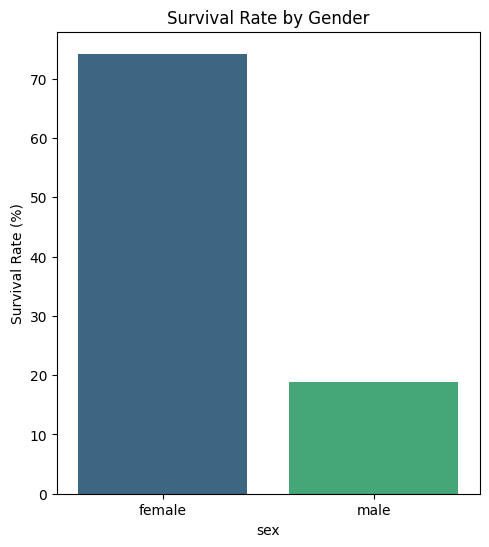

In [18]:
# Visualization: Survival Rate by Gender and Class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=survived_by_gender.index, y=survived_by_gender.values, palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')


C:\Users\SAMIA NOREEN\AppData\Local\Temp\ipykernel_3904\3026030767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_by_class.index, y=survived_by_class.values, palette='plasma')


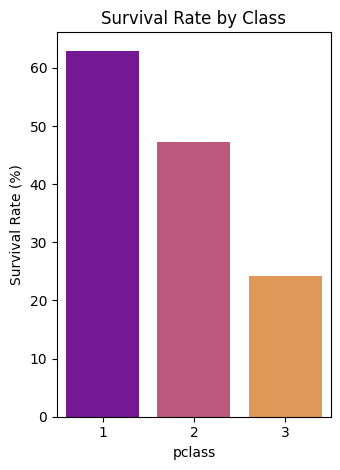

In [19]:
plt.subplot(1, 2, 2)
sns.barplot(x=survived_by_class.index, y=survived_by_class.values, palette='plasma')
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate (%)')
plt.tight_layout()
plt.show()


3. Relationship: Correlation and Dependencies
This section explores the relationships between numerical variables to identify how they influence each other and the outcome (survived).

In [20]:
# --- Relationship Analysis ---\n

# A. Correlation Matrix of Numerical Features
# We will check the correlation between fare, age, and survival.
numerical_df = df[['survived', 'age', 'fare', 'pclass']]
correlation_matrix = numerical_df.corr()
print("1. Correlation Matrix of Numerical Features:")
print(correlation_matrix)
print("\n")


1. Correlation Matrix of Numerical Features:
          survived       age      fare    pclass
survived  1.000000 -0.064910  0.257307 -0.338481
age      -0.064910  1.000000  0.096688 -0.339898
fare      0.257307  0.096688  1.000000 -0.549500
pclass   -0.338481 -0.339898 -0.549500  1.000000




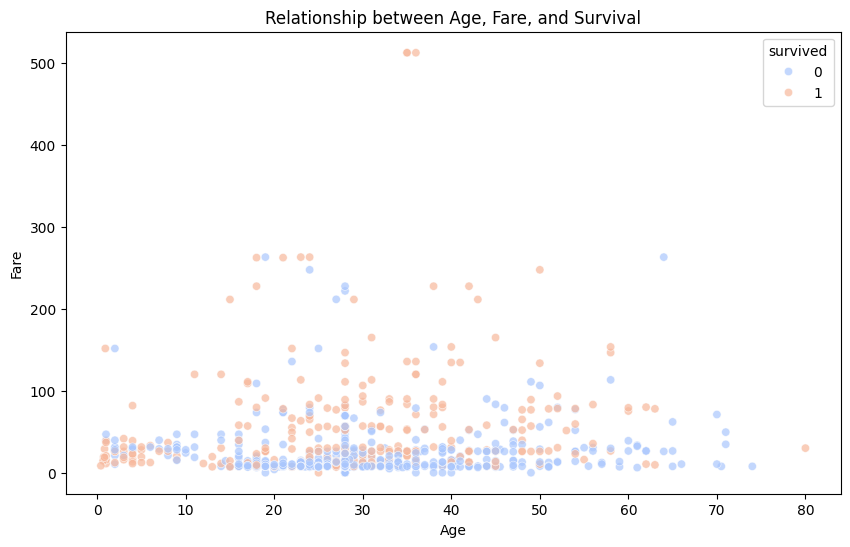

In [21]:
# B. Visualizing the Relationship between Age, Fare, and Survival
# This scatter plot shows how fare and age are distributed, with color representing survival.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


C:\Users\SAMIA NOREEN\AppData\Local\Temp\ipykernel_3904\394706292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette='Pastel1')


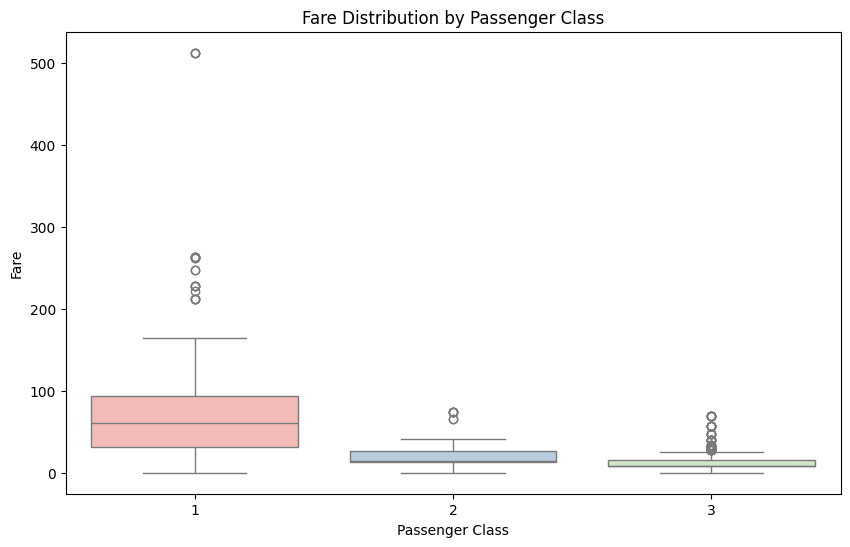

In [22]:
# C. Relationship between Passenger Class and Fare
# A boxplot is excellent for showing the distribution of a continuous variable across categorical groups.
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df, palette='Pastel1')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


4. Distribution: Variable Spread
Finally, we'll examine the distribution of continuous variables like age and fare using histograms to see their spread and central tendencies.

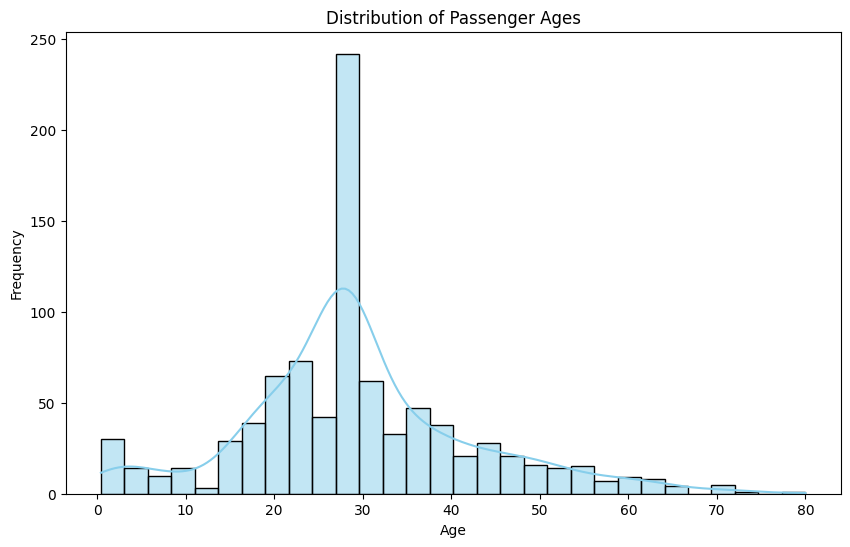

In [23]:
# --- Distribution Analysis ---\n

# A. Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


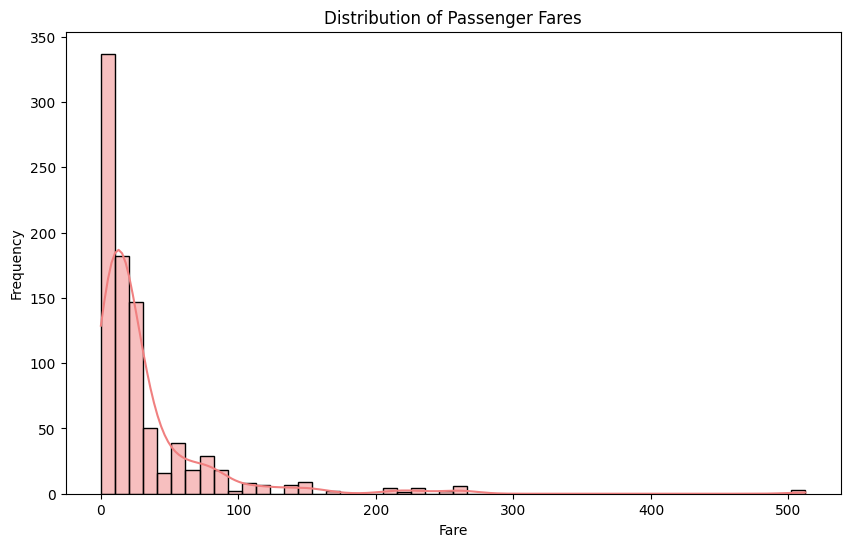

In [24]:
# B. Distribution of Fares
# Note the long tail on the fare distribution, indicating a few very expensive tickets.
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], kde=True, bins=50, color='lightcoral')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Summary of Findings
By completing these steps, you will have a clear understanding of the Titanic dataset. You'll have generated insights that show:

The demographic makeup of the passengers by gender, class, and age.

A significant difference in survival rates based on gender and passenger class.

Correlations between numerical features like age, fare, and survival.

The overall distribution of ages and ticket prices, highlighting common values and outliers.

This structured approach is a powerful way to begin any data analysis project.